In [1]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn import manifold
import upsetplot
import seaborn as sns
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (10,10)
sns.set_theme(style="whitegrid")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### Assemblies
with open("../Figure3/ordered_final_assemblies.npy", 'rb') as f:
    ordered_final_assemblies = np.load(f, allow_pickle=True)

A 1 Size: 1016 Neurons
A 2 Size: 542 Neurons
A 3 Size: 328 Neurons
A 4 Size: 325 Neurons
A 5 Size: 230 Neurons
A 6 Size: 188 Neurons
A 7 Size: 187 Neurons
A 8 Size: 181 Neurons
A 9 Size: 121 Neurons
A 10 Size: 114 Neurons
A 11 Size: 112 Neurons
A 12 Size: 61 Neurons
A 13 Size: 48 Neurons
A 14 Size: 35 Neurons
A 15 Size: 23 Neurons


Text(0.5, 1.0, 'Intersection of Assemblies in Scan 1.3 of V1DD')

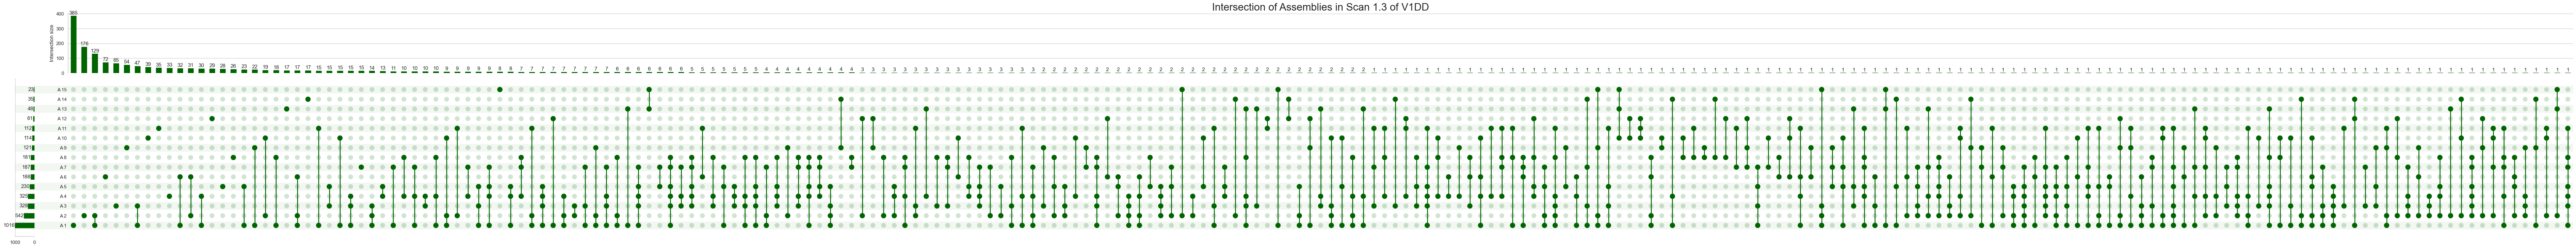

In [3]:
assemblies = {}
for i, assembly in enumerate(ordered_final_assemblies):
    print(f'A {i + 1} Size: {len(assembly)} Neurons')
    assemblies[f"A {i + 1}"] = assembly - 1 # Correct the IDs for Python Indexing
all_sets = upsetplot.from_contents(assemblies)

ax_dict = upsetplot.UpSet(all_sets, subset_size='count', min_subset_size= 1, 
                            show_counts = True, show_percentages = False,
                            sort_by = 'cardinality', facecolor="darkgreen").plot()
plt.title("Intersection of Assemblies in Scan 1.3 of V1DD", size = 24)
#plt.savefig("Assemblies_All_Intersection_Upset_Plot", dpi = 600)

Text(0.5, 1.0, 'Intersection of Assemblies in Scan 1.3 of V1DD')

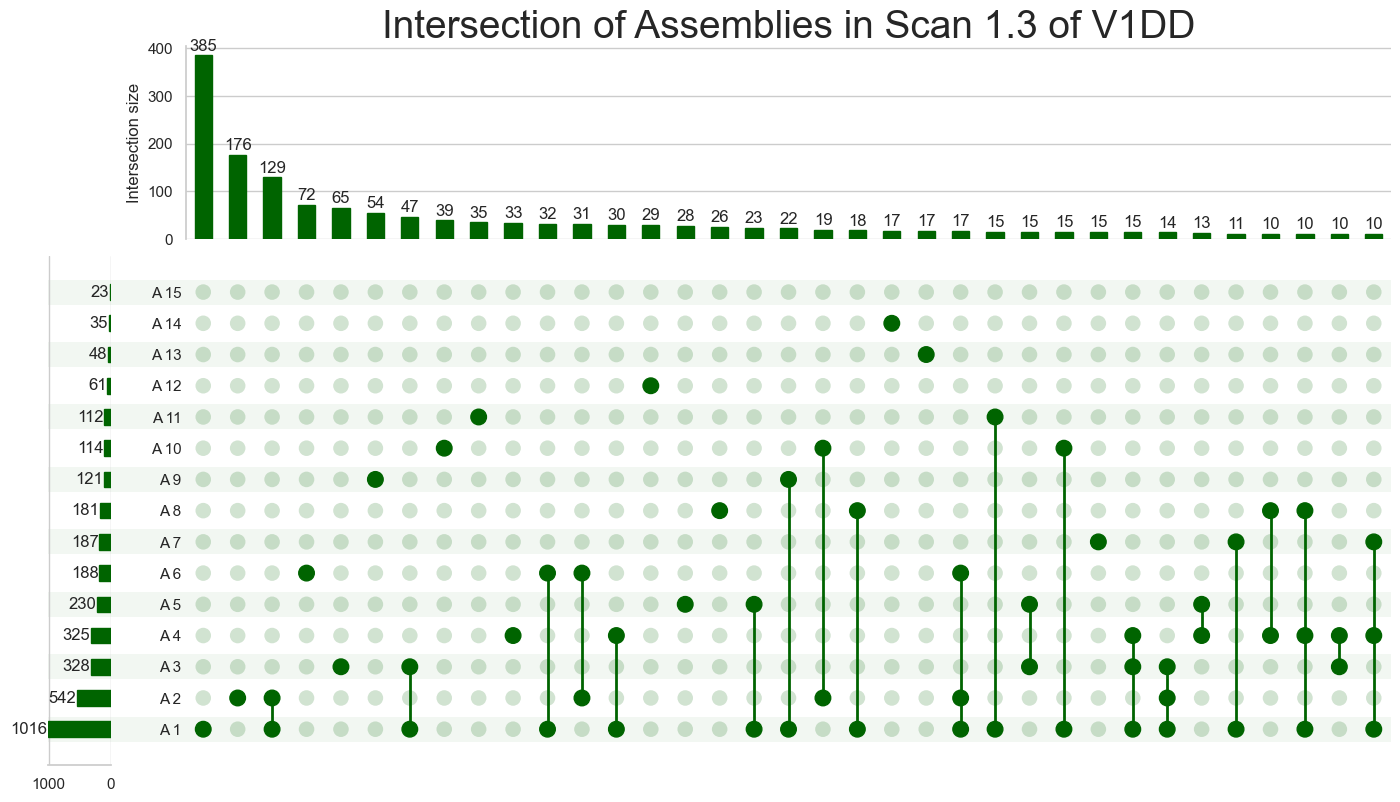

In [4]:
ax_dict = upsetplot.UpSet(all_sets, subset_size='count', min_subset_size= 10, 
                            show_counts = True, show_percentages = False,
                            sort_by = 'cardinality', facecolor="darkgreen").plot()
plt.title("Intersection of Assemblies in Scan 1.3 of V1DD", size = 28)
# plt.savefig("Assemblies_Intersection_Upset_Plot", dpi = 1200)

In [5]:
### Random Ensembles
with open("random_ensembles.pkl", 'rb') as f:
    random_ensembles = pickle.load(f)

random_ensembles


[array([   7,    8,   10, ..., 2705, 2706, 2707]),
 array([   3,   11,   12,   14,   17,   19,   23,   28,   35,   41,   58,
          64,   71,   82,   83,   94,   96,   98,   99,  101,  114,  127,
         130,  132,  138,  143,  144,  148,  149,  156,  159,  163,  165,
         166,  170,  172,  189,  190,  196,  205,  208,  214,  218,  235,
         239,  243,  245,  251,  256,  258,  259,  267,  269,  272,  274,
         281,  285,  286,  316,  317,  319,  322,  330,  334,  337,  338,
         346,  348,  363,  365,  368,  376,  379,  387,  392,  394,  401,
         402,  407,  413,  414,  417,  426,  435,  453,  454,  458,  461,
         471,  475,  480,  481,  483,  486,  489,  503,  519,  521,  526,
         529,  532,  562,  570,  571,  587,  591,  598,  599,  609,  613,
         623,  626,  633,  645,  651,  653,  654,  656,  668,  672,  687,
         692,  694,  698,  699,  700,  710,  718,  721,  730,  737,  752,
         753,  754,  756,  759,  761,  766,  770,  773,  781,

RE 1 Size: 1016 Neurons
RE 2 Size: 542 Neurons
RE 3 Size: 328 Neurons
RE 4 Size: 325 Neurons
RE 5 Size: 230 Neurons
RE 6 Size: 188 Neurons
RE 7 Size: 187 Neurons
RE 8 Size: 181 Neurons
RE 9 Size: 121 Neurons
RE 10 Size: 114 Neurons
RE 11 Size: 112 Neurons
RE 12 Size: 61 Neurons
RE 13 Size: 48 Neurons
RE 14 Size: 35 Neurons
RE 15 Size: 23 Neurons


Text(0.5, 1.0, 'Intersection of Random Ensembles in Scan 1.3 of V1DD')

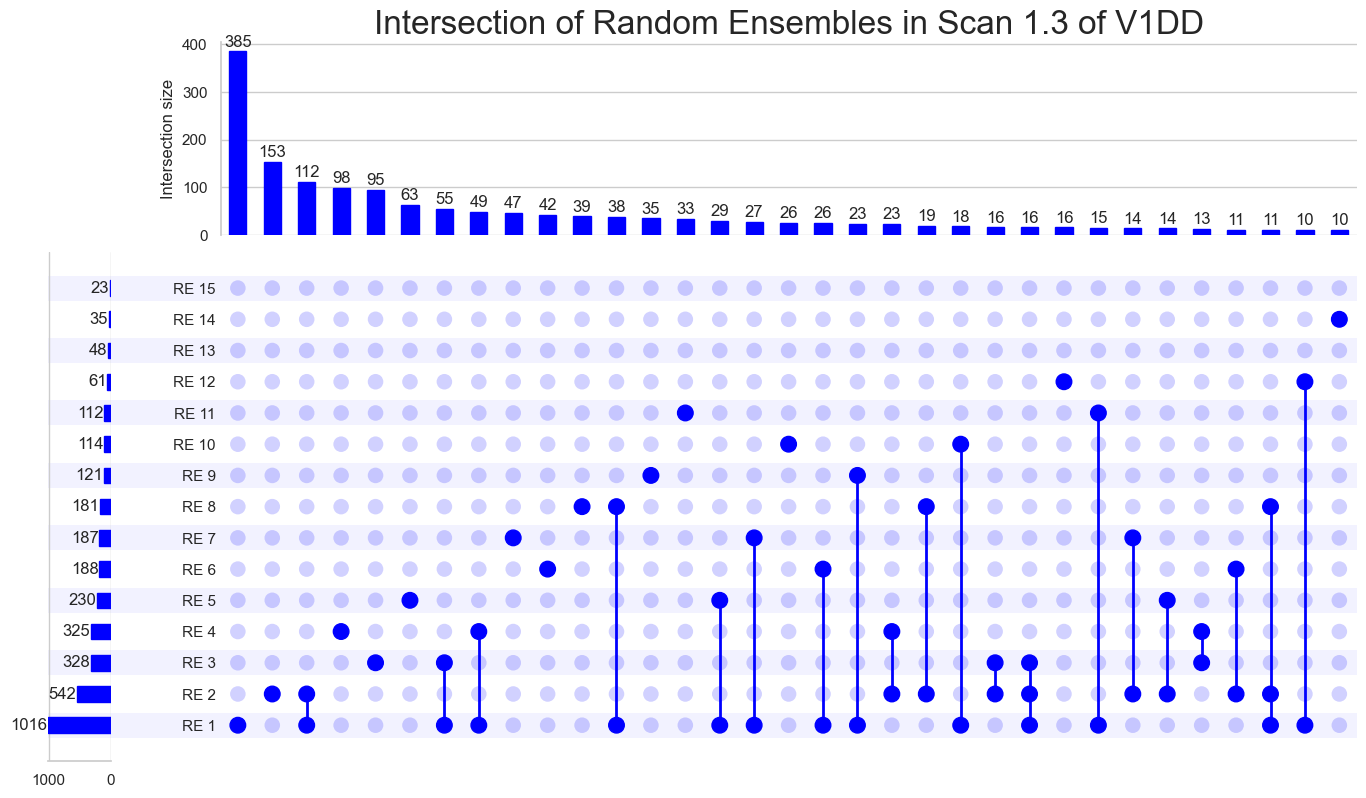

In [7]:
RE = {}
for i, ensemble in enumerate(random_ensembles):
    print(f'RE {i + 1} Size: {len(ensemble)} Neurons')
    RE[f"RE {i + 1}"] = ensemble - 1 # Correct the IDs for Python Indexing
all_sets = upsetplot.from_contents(RE)

ax_dict = upsetplot.UpSet(all_sets, subset_size='count', min_subset_size= 10, 
                            show_counts = True, show_percentages = False,
                            sort_by = 'cardinality', facecolor="blue").plot()
plt.title("Intersection of Random Ensembles in Scan 1.3 of V1DD", size = 24)